<hr style="border:5px solid #108999"> </hr>

### Complete End-to-end project on `LIFE EXPECTANCY` <hr style="border:4.5px solid #108999"> </hr>

### Libraries import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

#sklearn libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### 1. Load the data

In [2]:
raw_data = pd.read_csv('Downloads/supervised_2828e84e6c033eca1b88cf9a82d5fefc.csv')

#view the data
raw_data.head()

,Country,Status,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,...,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
0,Cook Islands,Developing,NaN,0,0.01,0.000000,98.0,0,82.8,0,...,3.58,98,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
1,Dominica,Developing,NaN,0,0.01,11.419555,96.0,0,58.4,0,...,5.58,96,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,NaN
2,Marshall Islands,Developing,NaN,0,0.01,871.878317,8.0,0,81.6,0,...,17.24,79,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,NaN
3,Monaco,Developing,NaN,0,0.01,0.000000,99.0,0,NaN,0,...,4.30,99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nauru,Developing,NaN,0,0.01,15.606596,87.0,0,87.3,0,...,4.65,87,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,NaN


### Exploratory Data Analysis

In [3]:
raw_data.shape

(193, 21)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          193 non-null    object 
 1   Status                           193 non-null    object 
 2   Adult_Mortality                  183 non-null    float64
 3   Infant_deaths                    193 non-null    int64  
 4   Alcohol                          15 non-null     float64
 5   Percentage_expenditure           193 non-null    float64
 6   Hepatitis_B                      184 non-null    float64
 7   Measles                          193 non-null    int64  
 8   BMI                              189 non-null    float64
 9   Under_five_deaths                193 non-null    int64  
 10  Polio                            193 non-null    int64  
 11  Total_expenditure                12 non-null     float64
 12  Diphtheria            

In [5]:
#check for missing columns
raw_data.isna().sum()

Country                              0
Status                               0
Adult_Mortality                     10
Infant_deaths                        0
Alcohol                            178
Percentage_expenditure               0
Hepatitis_B                          9
Measles                              0
BMI                                  4
Under_five_deaths                    0
Polio                                0
Total_expenditure                  181
Diphtheria                           0
HIV_AIDS                             0
GDP                                 34
Population                          49
Thinness_1_19_years                  4
Thinness_5_9_years                   4
Income_composition_of_resources     17
Schooling                           13
Life_Expectancy                     10
dtype: int64

We would drop the `Alcohol` and `Total_expenditure` columns as they contains more than 50% missing values

In [6]:
data = raw_data.drop(['Alcohol', 'Total_expenditure'], axis=1)

data.head()

,Country,Status,Adult_Mortality,Infant_deaths,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
0,Cook Islands,Developing,NaN,0,0.000000,98.0,0,82.8,0,98,98,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
1,Dominica,Developing,NaN,0,11.419555,96.0,0,58.4,0,96,96,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,NaN
2,Marshall Islands,Developing,NaN,0,871.878317,8.0,0,81.6,0,79,79,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,NaN
3,Monaco,Developing,NaN,0,0.000000,99.0,0,NaN,0,99,99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nauru,Developing,NaN,0,15.606596,87.0,0,87.3,0,87,87,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,NaN


In [7]:
#check numerical columns

for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Adult_Mortality
Infant_deaths
Percentage_expenditure
Hepatitis_B
Measles
BMI
Under_five_deaths
Polio
Diphtheria
HIV_AIDS
GDP
Population
Thinness_1_19_years
Thinness_5_9_years
Income_composition_of_resources
Schooling
Life_Expectancy


In [8]:
#check for missing numerical columns
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

Adult_Mortality
Hepatitis_B
BMI
GDP
Population
Thinness_1_19_years
Thinness_5_9_years
Income_composition_of_resources
Schooling
Life_Expectancy


In [9]:
#check for missing categorical features
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isna(content).sum():
            print(label)

There are no missing categorical features. Hence, we will fill the missing numerical features.

In [10]:
#fill the missing numerical columns using median

for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = data[label].fillna(data[label].median())
            
#check the data             
data.isna().sum()

Country                            0
Status                             0
Adult_Mortality                    0
Infant_deaths                      0
Percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Thinness_1_19_years                0
Thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
Life_Expectancy                    0
dtype: int64

#### Plot Some Visuals and Analysis

<AxesSubplot:xlabel='Adult_Mortality', ylabel='Life_Expectancy'>

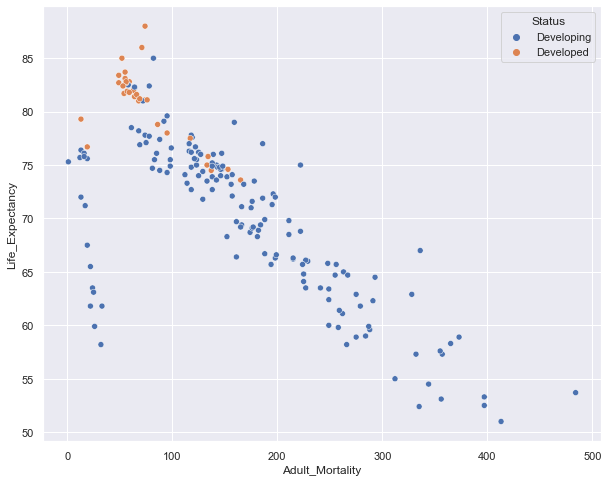

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data['Adult_Mortality'], data['Life_Expectancy'], hue=data['Status'])

Conclusion: The life expectancy of those in the Developed country tends to be higher. The `Adult Mortality` tends to be more in the Developing countries. This can be due to lack of good medical and health facilities.

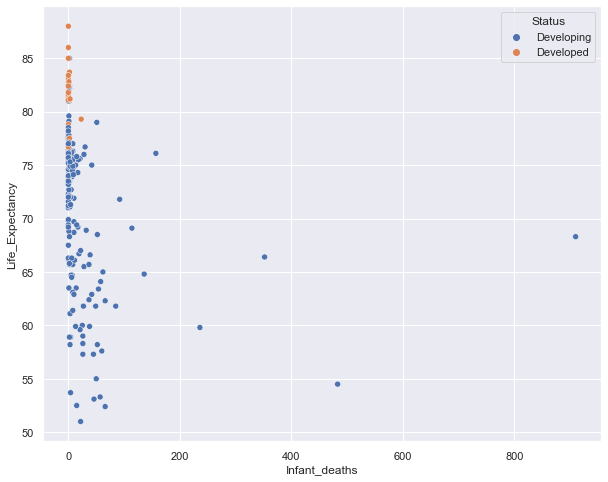

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['Infant_deaths'], y = data['Life_Expectancy'], hue=data['Status'])
plt.show()

Conclusion: Similarly, the `infant_death` rate tends to increase in the Developing countries. As the life expectancy of infants tends to be higher by 75% compared to that of the developing countries.

In [13]:
data.dtypes

Country                             object
Status                              object
Adult_Mortality                    float64
Infant_deaths                        int64
Percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
Under_five_deaths                    int64
Polio                                int64
Diphtheria                           int64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1_19_years                float64
Thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
Life_Expectancy                    float64
dtype: object

<AxesSubplot:xlabel='Income_composition_of_resources', ylabel='Life_Expectancy'>

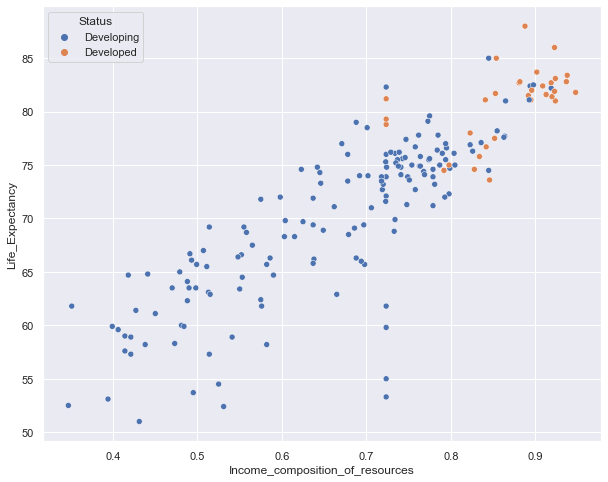

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = 'Income_composition_of_resources', y = 'Life_Expectancy', hue='Status')

Conclusion: Those people with higer income resources has high life expectancy. Also, people who live in developed countries tends to have higher income resources. Therefore, those with higher income resources will live longer than those with low income resources.

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

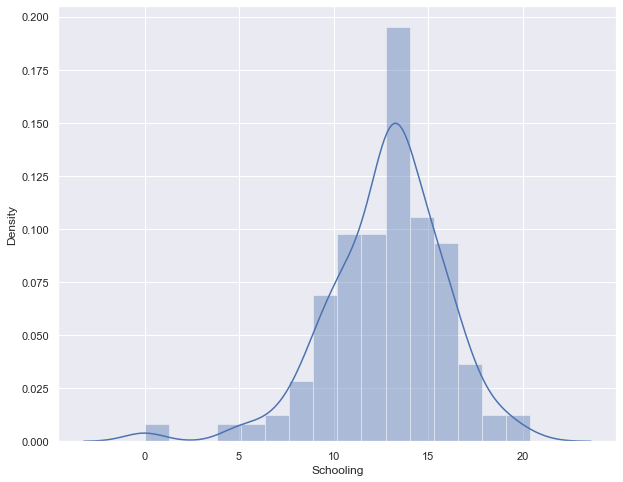

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(data['Schooling'])

<AxesSubplot:xlabel='Schooling', ylabel='Life_Expectancy'>

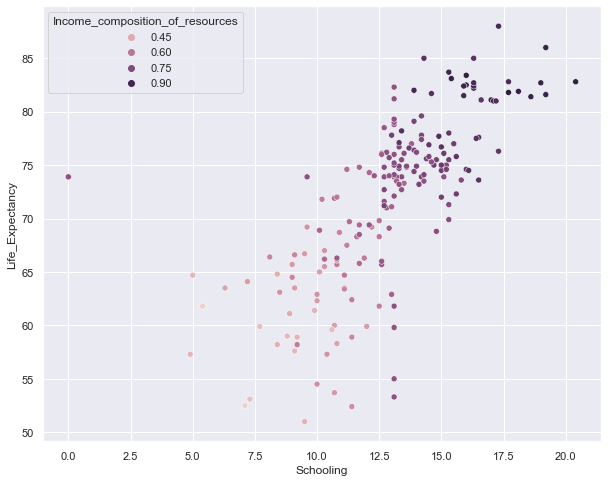

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x='Schooling', y='Life_Expectancy', hue='Income_composition_of_resources')

Conclusion: In the plot above, those with higher income can afford schooling and those who attends school has a higher percentage of life expectancy compared to those without education. Hence, those with income resources of 75% and above tends have a higher life expectancy.

<AxesSubplot:xlabel='Under_five_deaths', ylabel='Life_Expectancy'>

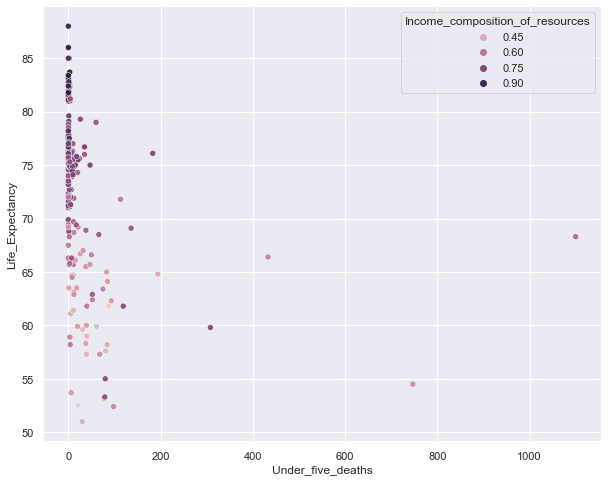

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = 'Under_five_deaths', y = 'Life_Expectancy', hue ="Income_composition_of_resources")

Conclusion: Those kids with parents of higher income resources tends to have a higher percentage of life expectancy compare to the kids with parents of lower imncome resources.

<AxesSubplot:xlabel='Population', ylabel='Life_Expectancy'>

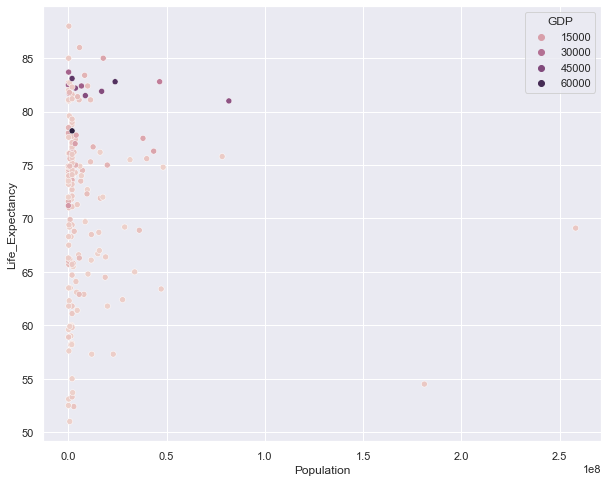

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x = 'Population', y = 'Life_Expectancy', hue = 'GDP')

Conclusion: Population of a country does not really implies whether the Life expectancy will be high or low. However, for a country with a low GDP, and higher population will negatively affect the life expectancy. 

In [19]:
data.dtypes

Country                             object
Status                              object
Adult_Mortality                    float64
Infant_deaths                        int64
Percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
Under_five_deaths                    int64
Polio                                int64
Diphtheria                           int64
HIV_AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1_19_years                float64
Thinness_5_9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
Life_Expectancy                    float64
dtype: object

### Comparing the various diseases distribution to the Life_Expectancy

<Figure size 720x576 with 0 Axes>

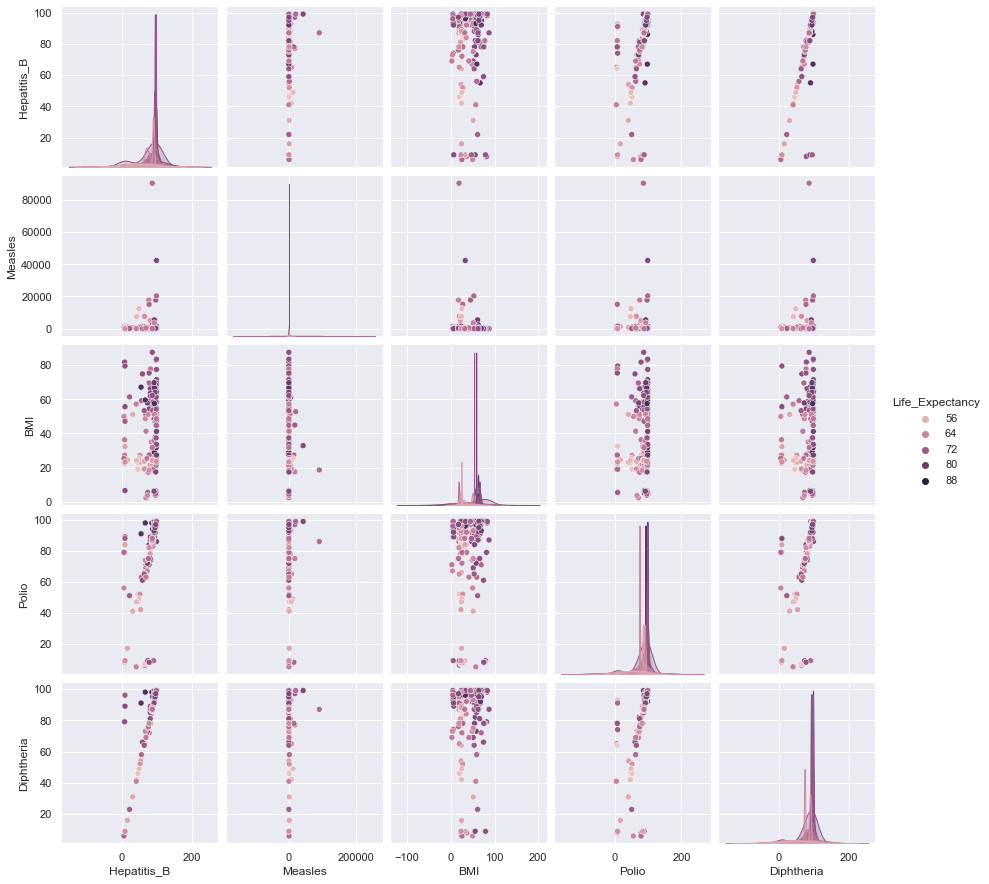

In [20]:
plt.figure(figsize=(10,8))
sns.pairplot(data = data, vars = ['Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria'], hue = 'Life_Expectancy')

Conclusion: Obviously as seen in the visualization comparing various diseases against the life expectancy; we can see that those with these disease has a very low percentage of living.

<Figure size 720x576 with 0 Axes>

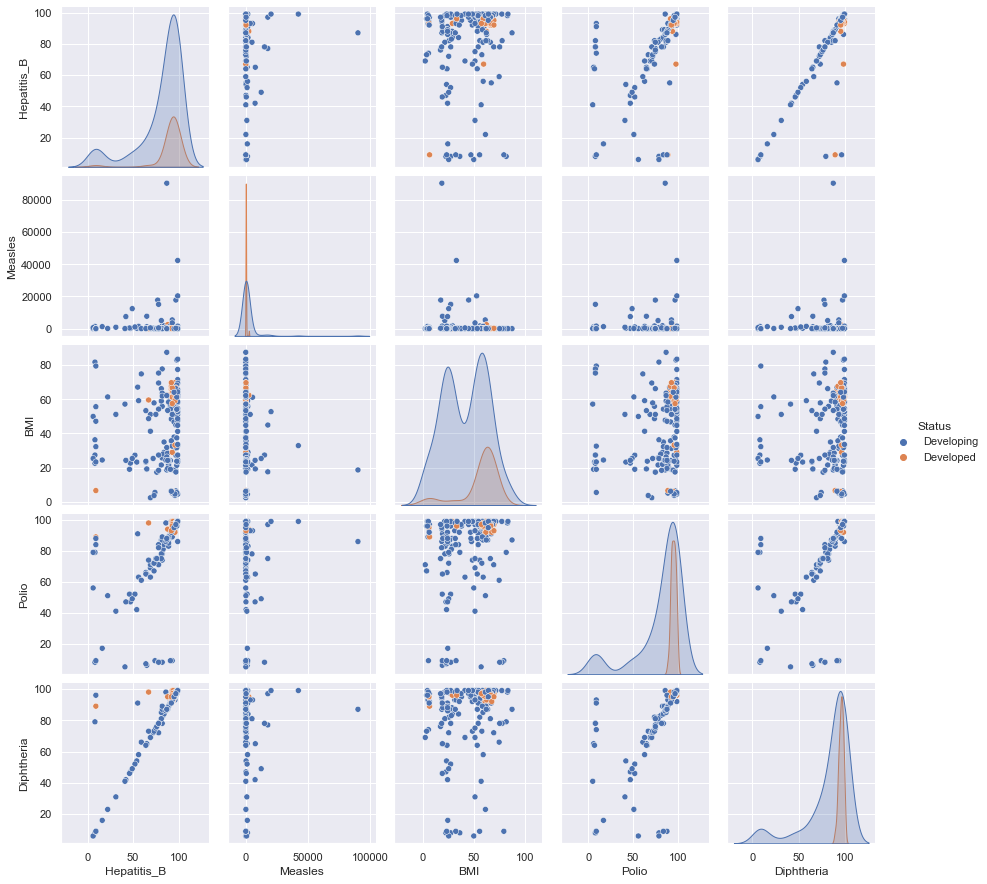

In [21]:
plt.figure(figsize=(10,8))
sns.pairplot(data = data, y_vars = 'Life_Expectancy', vars = ['Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria'], hue = 'Status')

Conclusion: These diseases are more common in the developing countries compared to its presence in the developed countries. This can be due to the presence of health facilities in the developed that can be used to mitigate/control the spread of these disease.

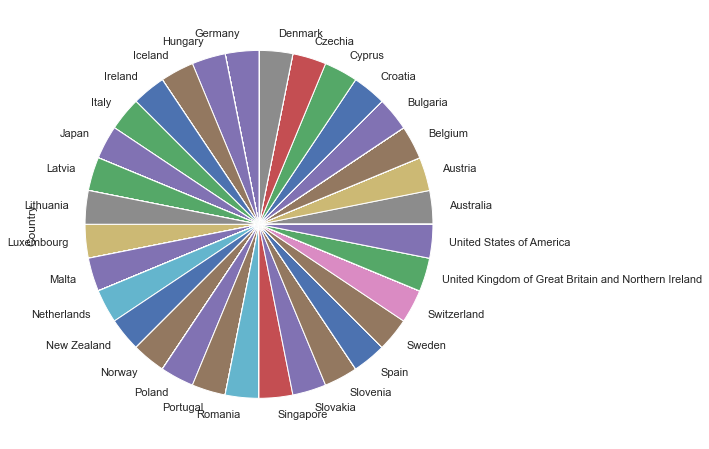

In [22]:
columns = ['Country']

for column in columns:
    plt.figure(figsize=(10,8))
    (data.query('Status == "Developed"')[column].value_counts()/data[column].value_counts()).plot(kind='pie')

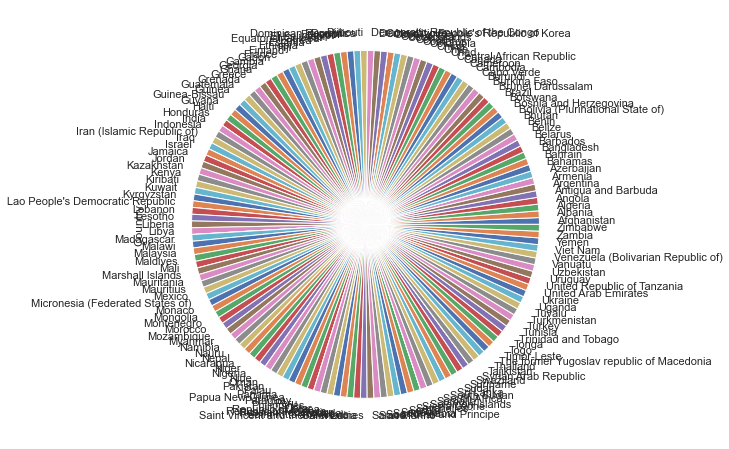

In [23]:
columns = ['Country']

for column in columns:
    plt.figure(figsize=(10,8))
    (data.query('Status == "Developing"')[column].value_counts()/data[column].value_counts()).plot(kind='pie')

Conclusion: We can see from the visualizations, that we have more developing countries than developed countries

### Checking the target

In [24]:
data['Life_Expectancy'].dtypes

dtype('float64')

* The target variable is a numerical values.

In [25]:
data['Life_Expectancy'].unique()

array([73.9, 65. , 77.8, 75.6, 52.4, 76.4, 76.3, 74.8, 82.8, 81.5, 72.7,
       76.1, 76.9, 71.8, 75.5, 72.3, 81.1, 71. , 60. , 69.8, 77. , 77.4,
       65.7, 75. , 77.7, 74.5, 59.9, 59.6, 73.3, 68.7, 57.3, 82.2, 52.5,
       53.1, 85. , 63.5, 64.7, 79.6, 78. , 79.1, 78.8, 53.3, 76. , 59.8,
       86. , 76.2, 79. , 73.5, 58.2, 77.6, 64.8, 69.9, 82.4, 66. , 61.1,
       74.4, 81. , 62.4, 73.6, 71.9, 59. , 58.9, 66.2, 74.6, 75.8, 82.7,
       68.3, 69.1, 68.9, 81.4, 82.5, 83.7, 74.1, 72. , 63.4, 66.3, 74.7,
       71.1, 74.9, 53.7, 61.4, 82. , 65.5, 58.3, 78.5, 81.7, 63.1, 76.7,
       69.4, 68.8, 74.3, 57.6, 66.6, 65.8, 69.2, 81.9, 81.6, 61.8, 54.5,
       81.8, 76.6, 66.4, 62.9, 74. , 68.5, 77.5, 78.2, 82.3, 72.1, 66.1,
       75.2, 73.2, 67.5, 66.7, 51. , 83.1, 88. , 55. , 64.1, 71.6, 83.4,
       64.5, 69.7, 75.7, 71.2, 75.3, 62.3, 71.3, 77.1, 81.2, 79.3, 67. ])

* From the above result, we can see that the target is a countinuous data output and hence it is a `Regression` task.

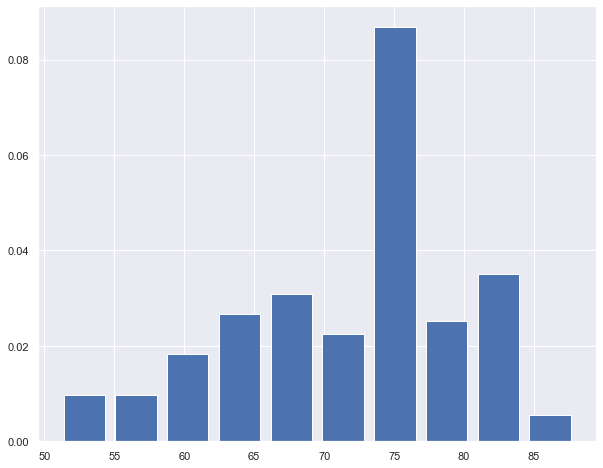

In [26]:
#frequency distribution of the target using a histogram
plt.figure(figsize=(10,8))
plt.hist(data['Life_Expectancy'], rwidth=0.8, density=True)
plt.show()

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Density'>

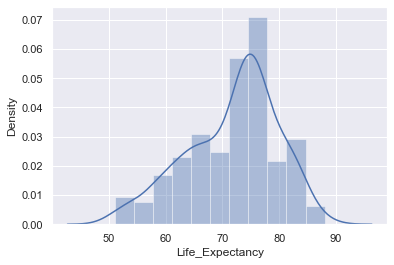

In [27]:
sns.distplot(data['Life_Expectancy'])

* The frequency distribution of the target is a `Normal distribution`. The target is left skewed or negatively skewed; meaning the data are more concentrated on the left hand side. This means that the Median of the target is greater than the Mean. This can be prove on the cell below.

In [28]:
data['Life_Expectancy'].mean(), data['Life_Expectancy'].median()

(71.73523316062173, 73.9)

In [29]:
data['Life_Expectancy'].value_counts(ascending=False)

73.9    11
75.0     4
74.9     3
65.7     3
74.6     3
        ..
65.0     1
71.0     1
60.0     1
69.8     1
67.0     1
Name: Life_Expectancy, Length: 132, dtype: int64

* The target is not nominal but numerical, and it is a countinuous. Hence, we can determine, the balance nature of the target. The issue of balancing the target is mostly related to categorical features or target. For example: features such as Gender, etc.

### Checking the features

Removing the target variable `Life_Expectancy`.

In [30]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head()

,Country,Status,Adult_Mortality,Infant_deaths,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling
0,Cook Islands,Developing,138.0,0,0.000000,98.0,0,82.8,0,98,98,0.1,2878.338370,1894575.5,0.1,0.1,0.7235,13.1
1,Dominica,Developing,138.0,0,11.419555,96.0,0,58.4,0,96,96,0.1,722.756650,1894575.5,2.7,2.6,0.7210,12.7
2,Marshall Islands,Developing,138.0,0,871.878317,8.0,0,81.6,0,79,79,0.1,3617.752354,1894575.5,0.1,0.1,0.7235,0.0
3,Monaco,Developing,138.0,0,0.000000,99.0,0,51.1,0,99,99,0.1,2878.338370,1894575.5,3.3,3.3,0.7235,13.1
4,Nauru,Developing,138.0,0,15.606596,87.0,0,87.3,0,87,87,0.1,136.183210,1894575.5,0.1,0.1,0.7235,9.6


In [31]:
#shape of the independent features
X.shape

(193, 18)

* The independent features has 193 rows and 18 columns.

* The features are not standardardized; to standardized the features, we will be using the `StandardScaler` from sklearn library.

## 2. Training and testing machine learning pipeline

In the project, we will be using the following machine learning steps to predicting the target.

1. Feature Selection
2. Data cleaning
3. Categorical features Encoding.
4. Feature Scaling
5. Feature splitting
6. Model selection
7. Evaluation

In [32]:
#view the data
data.head()

,Country,Status,Adult_Mortality,Infant_deaths,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
0,Cook Islands,Developing,138.0,0,0.000000,98.0,0,82.8,0,98,98,0.1,2878.338370,1894575.5,0.1,0.1,0.7235,13.1,73.9
1,Dominica,Developing,138.0,0,11.419555,96.0,0,58.4,0,96,96,0.1,722.756650,1894575.5,2.7,2.6,0.7210,12.7,73.9
2,Marshall Islands,Developing,138.0,0,871.878317,8.0,0,81.6,0,79,79,0.1,3617.752354,1894575.5,0.1,0.1,0.7235,0.0,73.9
3,Monaco,Developing,138.0,0,0.000000,99.0,0,51.1,0,99,99,0.1,2878.338370,1894575.5,3.3,3.3,0.7235,13.1,73.9
4,Nauru,Developing,138.0,0,15.606596,87.0,0,87.3,0,87,87,0.1,136.183210,1894575.5,0.1,0.1,0.7235,9.6,73.9


### Feature Selection using Pearson correlation

In [33]:
corr = data.corr()
corr

,Adult_Mortality,Infant_deaths,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
Adult_Mortality,1.000000,0.189948,-0.029670,-0.228317,0.052635,-0.345157,0.213724,-0.360469,-0.309943,0.621137,-0.313215,0.055668,0.290662,0.295200,-0.624549,-0.461291,-0.779276
Infant_deaths,0.189948,1.000000,-0.031048,-0.082939,0.801244,-0.223222,0.994219,-0.125336,-0.112367,0.101343,-0.109684,0.272308,0.529386,0.529479,-0.202692,-0.170063,-0.244436
Percentage_expenditure,-0.029670,-0.031048,1.000000,-0.178091,-0.022793,0.178776,-0.031979,-0.010498,-0.005551,-0.051091,-0.037108,-0.031670,-0.103507,-0.102029,0.032109,-0.267603,0.041679
Hepatitis_B,-0.228317,-0.082939,-0.178091,1.000000,0.013431,0.117722,-0.099604,0.611537,0.902243,-0.359555,0.118373,-0.067985,-0.045770,-0.083564,0.314724,0.420543,0.397404
Measles,0.052635,0.801244,-0.022793,0.013431,1.000000,-0.129847,0.765390,-0.027385,-0.000897,-0.022295,-0.067871,0.131913,0.343458,0.338641,-0.076985,-0.052807,-0.077190
BMI,-0.345157,-0.223222,0.178776,0.117722,-0.129847,1.000000,-0.234014,0.176296,0.154738,-0.288171,0.267965,-0.034105,-0.495836,-0.511110,0.535427,0.358137,0.486905
Under_five_deaths,0.213724,0.994219,-0.031979,-0.099604,0.765390,-0.234014,1.000000,-0.142452,-0.131411,0.128109,-0.114111,0.309500,0.521122,0.520097,-0.223734,-0.186365,-0.275033
Polio,-0.360469,-0.125336,-0.010498,0.611537,-0.027385,0.176296,-0.142452,1.000000,0.684104,-0.388746,0.205809,-0.232031,-0.176703,-0.178555,0.446914,0.421411,0.498356
Diphtheria,-0.309943,-0.112367,-0.005551,0.902243,-0.000897,0.154738,-0.131411,0.684104,1.000000,-0.421606,0.194762,-0.074916,-0.095482,-0.135218,0.410492,0.428536,0.479688
HIV_AIDS,0.621137,0.101343,-0.051091,-0.359555,-0.022295,-0.288171,0.128109,-0.388746,-0.421606,1.000000,-0.170148,0.048974,0.191299,0.176065,-0.478335,-0.333204,-0.610431


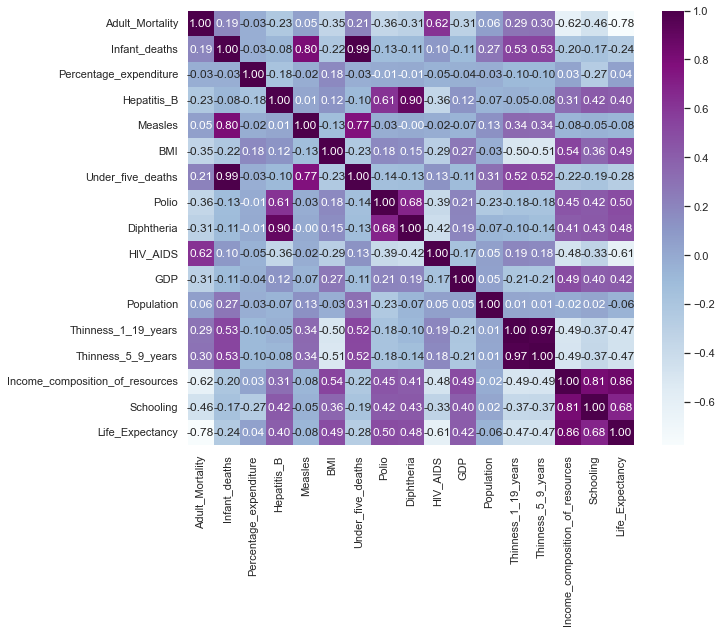

In [34]:
#visualize the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           annot=True,
           fmt='.2f',
           cmap='BuPu')
plt.show()

We will be dropping the following features `Percentage_expenditure`, `Under_five_deaths` and `Measles`. This is due to the fact that they are not highly positively correlated or highly negativately correlated to the target. Hence, their coefficient will be irrelavant to predicting the target.

In [35]:
data = data.drop(['Percentage_expenditure', 'Under_five_deaths', 'Measles'], axis=1)

data.head()

,Country,Status,Adult_Mortality,Infant_deaths,Hepatitis_B,BMI,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
0,Cook Islands,Developing,138.0,0,98.0,82.8,98,98,0.1,2878.338370,1894575.5,0.1,0.1,0.7235,13.1,73.9
1,Dominica,Developing,138.0,0,96.0,58.4,96,96,0.1,722.756650,1894575.5,2.7,2.6,0.7210,12.7,73.9
2,Marshall Islands,Developing,138.0,0,8.0,81.6,79,79,0.1,3617.752354,1894575.5,0.1,0.1,0.7235,0.0,73.9
3,Monaco,Developing,138.0,0,99.0,51.1,99,99,0.1,2878.338370,1894575.5,3.3,3.3,0.7235,13.1,73.9
4,Nauru,Developing,138.0,0,87.0,87.3,87,87,0.1,136.183210,1894575.5,0.1,0.1,0.7235,9.6,73.9


### Data Preprocessing

In [36]:
#missing data
data.isna().sum()

Country                            0
Status                             0
Adult_Mortality                    0
Infant_deaths                      0
Hepatitis_B                        0
BMI                                0
Polio                              0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Thinness_1_19_years                0
Thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
Life_Expectancy                    0
dtype: int64

Feature Encoding using OneHotEncoder

In [37]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = data[label].astype('category').cat.codes

In [38]:
data.head()

,Country,Status,Adult_Mortality,Infant_deaths,Hepatitis_B,BMI,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling,Life_Expectancy
0,38,1,138.0,0,98.0,82.8,98,98,0.1,2878.338370,1894575.5,0.1,0.1,0.7235,13.1,73.9
1,49,1,138.0,0,96.0,58.4,96,96,0.1,722.756650,1894575.5,2.7,2.6,0.7210,12.7,73.9
2,105,1,138.0,0,8.0,81.6,79,79,0.1,3617.752354,1894575.5,0.1,0.1,0.7235,0.0,73.9
3,110,1,138.0,0,99.0,51.1,99,99,0.1,2878.338370,1894575.5,3.3,3.3,0.7235,13.1,73.9
4,117,1,138.0,0,87.0,87.3,87,87,0.1,136.183210,1894575.5,0.1,0.1,0.7235,9.6,73.9


In [39]:
data['Status'].unique()

array([1, 0], dtype=int8)

In [40]:
data['Country'].unique()

array([ 38,  49, 105, 110, 117, 124, 128, 142, 146, 178,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 106, 107, 108, 109,
       111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 125,
       126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 18

In [41]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Feature Scaling using StandardScaler

We would not be scaling the scaling the categorical features. Hence we would be creating a scaler class to help omit the encoded features.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomerScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy=copy, with_mean = with_mean, with_std = with_std)
        self.columns = columns
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std
        
    def fit(self, X, y=None):
        self.scaler = StandardScaler(copy=self.copy, with_mean = self.with_mean, with_std = self.with_std)
        self.scaler.fit(X[self.columns], y)
        self.with_mean = np.mean(X[self.columns])
        self.with_var = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)
        X_not_scaled = X.iloc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [43]:
#using list comprehension to omit columns to scale
columns_to_omit = ['Country', 'Status']

columns_to_scale = [x for x in X.columns.values if x not in columns_to_omit]
columns_to_scale

['Adult_Mortality',
 'Infant_deaths',
 'Hepatitis_B',
 'BMI',
 'Polio',
 'Diphtheria',
 'HIV_AIDS',
 'GDP',
 'Population',
 'Thinness_1_19_years',
 'Thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling']

In [44]:
scaler = CustomerScaler(columns_to_scale)

In [45]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

,Country,Status,Adult_Mortality,Infant_deaths,Hepatitis_B,BMI,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_years,Thinness_5_9_years,Income_composition_of_resources,Schooling
0,38,1,-0.148667,-0.277153,0.635945,1.816504,0.608807,0.601450,-0.405274,-0.323002,-0.269071,-1.054614,-1.043165,0.193140,0.095806
1,49,1,-0.148667,-0.277153,0.553404,0.673235,0.526524,0.511986,-0.405274,-0.526964,-0.269071,-0.410655,-0.435942,0.175934,-0.034869
2,105,1,-0.148667,-0.277153,-3.078365,1.760277,-0.172879,-0.248460,-0.405274,-0.253038,-0.269071,-1.054614,-1.043165,0.193140,-4.183811
3,110,1,-0.148667,-0.277153,0.677215,0.331191,0.649948,0.646182,-0.405274,-0.323002,-0.269071,-0.262049,-0.265920,0.193140,0.095806
4,117,1,-0.148667,-0.277153,0.181973,2.027352,0.156252,0.109397,-0.405274,-0.582465,-0.269071,-1.054614,-1.043165,0.193140,-1.047603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,1,0.051760,-0.166635,0.181973,0.846599,0.156252,0.109397,-0.405274,-0.323002,-0.269071,-0.683099,-0.703120,0.506298,0.487832
189,189,1,-0.264704,0.066680,0.594674,-1.243146,0.567665,0.556718,-0.405274,-0.323002,-0.269071,2.437624,2.454439,-0.120017,-0.067538
190,190,1,0.758531,0.177197,-0.560889,-0.127990,-0.831140,-0.695781,-0.405274,-0.323002,-0.269071,2.289018,2.187261,-1.352000,-1.243616
191,191,1,-1.256292,0.054400,-3.037095,-0.966699,-3.052772,-3.379707,2.644159,-0.471030,-0.338137,0.480980,0.414170,-0.822041,-0.100207


In [46]:
#split the dataset training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((154, 15), (39, 15), (154,), (39,))

1. Baseline 

You cannot know which algorithm will perform the best for your problem before hand so you must try a suite of algorithms and see what works best, then double down on it. As such, it is critically important to develop a baseline of performance when working on a machine learning problem.

A baseline provides a point of reference from which to compare other machine learning algorithms.You can get an idea of both the absolute performance increases you can achieve over the baseline as well as lift ratios that show you relatively how much better you are doing.

Without a baseline you do not know how well you are doing on your problem. You have no point of reference to consider whether or not you have or are continuing to add value. The baseline defines the hurdle that all other machine learning algorithms must cross to demonstrate “skill” on the problem. In this project, our baseline will be comparing different machine learning algorithms to determine which performs best for our dataset.



**LinearRegression model**


In [47]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [48]:
test_acc = linReg.score(X_test, y_test)
print("The test accuracy score (R2) of the LinearRegression is: {0:.2f}%".format(test_acc *100))

The test accuracy score (R2) of the LinearRegression is: 81.86%


In [49]:
train_acc = linReg.score(X_train, y_train)
print("The train accuracy score of the LinearRegression is: {0:.2f}%".format(train_acc *100))

The train accuracy score of the LinearRegression is: 86.73%


For the LinearRegression model, we can that this is a balance fit model.

**Random Forest Regressor**

In [50]:
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
test_acc = rfg.score(X_test, y_test)
print("The test accuracy score (R2) of the RandomForest Regressor is: {0:.2f}%".format(test_acc *100))

The test accuracy score (R2) of the RandomForest Regressor is: 88.72%


In [52]:
train_acc = rfg.score(X_train, y_train)
print("The train accuracy score of the RandomForest Regressor is: {0:.2f}%".format(train_acc *100))

The train accuracy score of the RandomForest Regressor is: 98.62%


For the RandomForest Regressor model, we can that this is a balance fit model.

### 3. Hyperparameter of the best performing RandomForest Regressor model using GridSearchCV and RandomizedSearchCV

The reason why we choose this approach is that it focuses on improving the model performance against the cross validation score of the model. In other to make sure that our model doesn't overfit or underfit, we carried the tuning using this method of hyperparameter and we have decided to tuned the model on 5-fold cross validation. Finally, we would compare the tuned model's accuracy with the previous model accuracy on both train and test data.

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
tuned_rfg = GridSearchCV(rfg,
                  {'n_estimators' : [100, 1000, 10000],
                  'max_features': [1.0, 3.0, 6.0]},
                  cv=5,
                  return_train_score=False)
tuned_rfg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [1.0, 3.0, 6.0],
                         'n_estimators': [100, 1000, 10000]})

In [55]:
test_acc_tun = tuned_rfg.score(X_test, y_test)
print('The tuned test score is : {0:.2f}%'.format(test_acc_tun *100))

The tuned test score is : 88.44%


In [56]:
train_acc_tun = tuned_rfg.score(X_train, y_train)
print("The tuned train score is: {0:.2f}%".format(train_acc_tun *100))

The tuned train score is: 98.69%


The changes between the tuned model and initial is from the train accuracy from 98.49% to 98.62%.

In [57]:
tuned_rfg.best_params_

{'max_features': 1.0, 'n_estimators': 100}

In [58]:
tuned_rfg.cv_results_

{'mean_fit_time': array([0.08709464, 0.84700465, 8.601545  , 0.0186202 , 0.17325621,
        1.72480116, 0.01846919, 0.17832417, 1.73856363]),
 'std_fit_time': array([1.99739966e-03, 2.95522379e-03, 1.49021920e-01, 3.09335235e-04,
        2.03908995e-04, 8.51728799e-03, 7.76384908e-05, 3.07245579e-03,
        4.22354448e-02]),
 'mean_score_time': array([0.00438719, 0.03584652, 0.43403125, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'std_score_time': array([0.00014555, 0.00045893, 0.06845965, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'param_max_features': masked_array(data=[1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 6.0, 6.0, 6.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 1000, 10000, 100, 1000, 10000, 100, 1000, 10000],
              mask=[False, False, False, 

In [59]:
d = pd.DataFrame(tuned_rfg.cv_results_)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087095,0.001997,0.004387,0.000146,1.0,100,"{'max_features': 1.0, 'n_estimators': 100}",0.891015,0.904683,0.893676,0.903331,0.908116,0.900164,0.006625,1
1,0.847005,0.002955,0.035847,0.000459,1.0,1000,"{'max_features': 1.0, 'n_estimators': 1000}",0.886812,0.907917,0.893105,0.901881,0.908308,0.899605,0.008437,3
2,8.601545,0.149022,0.434031,0.068460,1.0,10000,"{'max_features': 1.0, 'n_estimators': 10000}",0.888175,0.909300,0.893861,0.901965,0.906297,0.899920,0.007842,2
3,0.018620,0.000309,0.000000,0.000000,3.0,100,"{'max_features': 3.0, 'n_estimators': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,0.173256,0.000204,0.000000,0.000000,3.0,1000,"{'max_features': 3.0, 'n_estimators': 1000}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,1.724801,0.008517,0.000000,0.000000,3.0,10000,"{'max_features': 3.0, 'n_estimators': 10000}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,0.018469,0.000078,0.000000,0.000000,6.0,100,"{'max_features': 6.0, 'n_estimators': 100}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.178324,0.003072,0.000000,0.000000,6.0,1000,"{'max_features': 6.0, 'n_estimators': 1000}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,1.738564,0.042235,0.000000,0.000000,6.0,10000,"{'max_features': 6.0, 'n_estimators': 10000}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [60]:
d[['param_max_features','param_n_estimators', 'params','mean_test_score']][:3]

,param_max_features,param_n_estimators,params,mean_test_score
0,1.0,100,"{'max_features': 1.0, 'n_estimators': 100}",0.900164
1,1.0,1000,"{'max_features': 1.0, 'n_estimators': 1000}",0.899605
2,1.0,10000,"{'max_features': 1.0, 'n_estimators': 10000}",0.899920


Now, let's use the other technique `RandomizedSearchCV`

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
rs = RandomizedSearchCV(rfg,
                       {'n_estimators':[100,1000, 10000],
                       'max_features': [0, 1.0, 3.0]},
                       cv=5,
                       return_train_score=False,
                       n_iter=2)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'max_features': [0, 1.0, 3.0],
                                        'n_estimators': [100, 1000, 10000]})

In [64]:
rs_test = rs.score(X_test, y_test)
print('The test score of the randomized cv is: {0:.2f}%'.format(rs_test*100))

The test score of the randomized cv is: 88.47%


In [65]:
rs_train = rs.score(X_train, y_train)
print('The train score of the randomized cv is: {0:.2f}%'.format(rs_train * 100))

The train score of the randomized cv is: 98.66%


In [66]:
rs.best_params_

{'n_estimators': 10000, 'max_features': 1.0}

In [67]:
rs.cv_results_

{'mean_fit_time': array([1.74059324, 8.67753539]),
 'std_fit_time': array([0.03479535, 0.12456234]),
 'mean_score_time': array([0.        , 0.38044081]),
 'std_score_time': array([0.        , 0.01355604]),
 'param_n_estimators': masked_array(data=[10000, 10000],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[0, 1.0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10000, 'max_features': 0},
  {'n_estimators': 10000, 'max_features': 1.0}],
 'split0_test_score': array([       nan, 0.89042288]),
 'split1_test_score': array([       nan, 0.91072031]),
 'split2_test_score': array([       nan, 0.89333557]),
 'split3_test_score': array([       nan, 0.90086248]),
 'split4_test_score': array([       nan, 0.90645001]),
 'mean_test_score': array([       nan, 0.90035825]),
 'std_test_score': array([     nan, 0.007652]),
 'rank_test_score': array([2, 1

In [68]:
d_rs = pd.DataFrame(rs.cv_results_)
d_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.740593,0.034795,0.000000,0.000000,10000,0,"{'n_estimators': 10000, 'max_features': 0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,8.677535,0.124562,0.380441,0.013556,10000,1.0,"{'n_estimators': 10000, 'max_features': 1.0}",0.890423,0.91072,0.893336,0.900862,0.90645,0.900358,0.007652,1


In [69]:
d_rs[['param_n_estimators', 'param_max_features', 'params', 'mean_test_score']]

,param_n_estimators,param_max_features,params,mean_test_score
0,10000,0,"{'n_estimators': 10000, 'max_features': 0}",NaN
1,10000,1.0,"{'n_estimators': 10000, 'max_features': 1.0}",0.900358


### 4. Model Interpretration

There would be multicollinearity in the feature if we had scaled the onehot encoded features. However, we took care of that during the `Feature scaling` phase of this work.

### Feature Importance

Recall that we already dropped some features after visualization using the Pearson's correlation. initially, we dropped those features which are low positively and low negatively correlated to the target. We want a simple model and keeping irrelevant feature will be overwhelming to our machine model. 

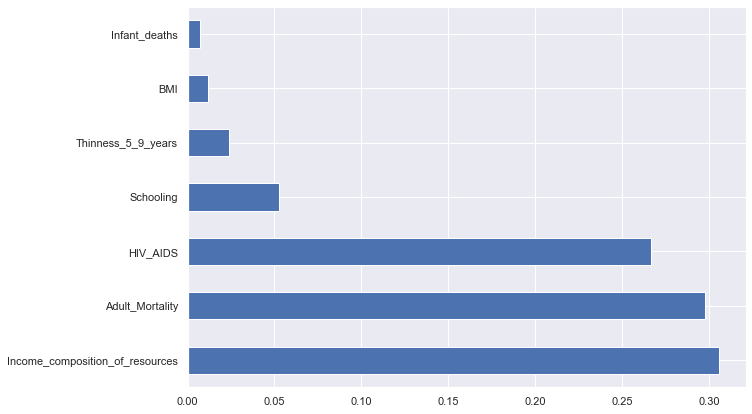

In [70]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rfg.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

From the barchart above, we can see that `Income_composition_of_resources` is the most important features relevant to predicting the target. This is true as when we visualized the Pearson's correlation using seaborn heatmap; the `Income_composition_of_resources` is the feature which is highly positively correlated with a value of 0.86 and highly negatively correlated with -0.62.

The most important aspect of designing a machine learning pipeline, it's designing its structure. However, it helps in reducing the entire time of the entire end-to-end machine learning workflow. The pipeline gives the engineer a particular direction or structure to follow when building a scalable machine learning model.


The steps with the most impact in the pipeline is the data cleaning, and data preprocessing phase of the pipeline. As the data cleaning and preprocessing takes quite a longer time before one can be boostful of building a good model. 

The strength of the workflow is its attention to `Standardization` of the features and also taking care of the onehot encoded features in order to avoid multicollinearity among features. Also, the hyperparameter with cross validation of 5-fold to avoid overfitting and unnderfitting of the model is another strength of the entire workflow.
However, it weakness is that we could have trained the data on other models inclding optimization models such as `XGBOOST` and see how they performed too.

In order to improve, the model performance, we can train the model on optimization models and see how they would perform on test data or unseen data.